<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=center>
<font face="IranNastaliq" size=30>
<p></p>
به نام خدا
</font>
<br>
<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مدیریت و اقتصاد شریف
</font>
<br>
<font color=blue>
اقتصاد سنجی ۱
</font>
<br>
ترم پاییز سال تحصیلی ۱۴۰۳-۱۴۰۲
<br>
دکتر کوثر یوسفی
</div>
<hr/>
<font color=red size=6>
<p></p>

<div align=center>بخش چهارم: رسم نمودار</div>
</font>
<div align=center>
نگین جعفری، محمدمهدی جراحی</div>
<hr>
</font></div>


<style type="text/css" scoped>
p{
border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
};
</style>


<div align=right>
منبع: درس یادگیری ماشین دکتر سید عباس حسینی و درس DS 100 تابستان 2020 دانشگاه برکلی</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
births = pd.read_csv('baby.csv')
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [3]:
births.shape

(1174, 6)


<h2 id="Bar-Plots">Bar Plots<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Bar-Plots">¶</h2>



<p>We often use bar plots to display distributions of a categorical variable:</p>


In [4]:
births['Maternal Smoker'].value_counts()

Maternal Smoker
False    715
True     459
Name: count, dtype: int64


<p>Note: putting a semicolon after a plot call hides all of the unnecessary text that comes after it (the <code>&lt;matplotlib.axes_....&gt;</code>).</p>


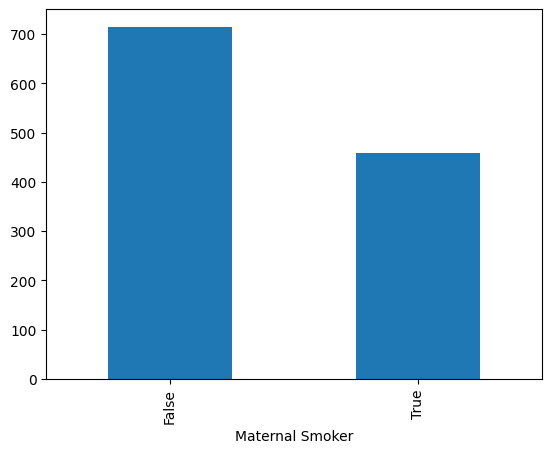

In [5]:
births['Maternal Smoker'].value_counts().plot(kind = 'bar');

value_counts().plot() ~ countplot

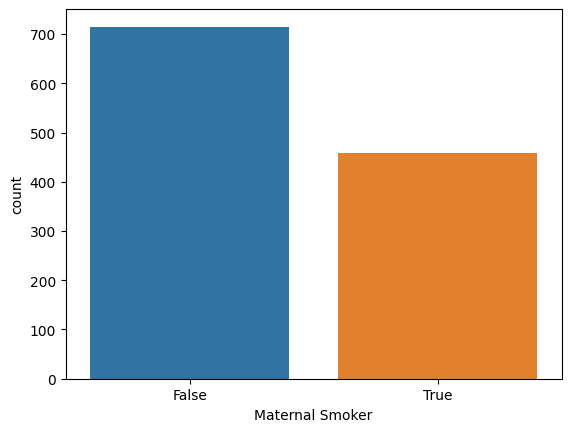

In [6]:
sns.countplot(x=births['Maternal Smoker']);
#change x to y


<p>But we can also use them to display a numerical variable that has been measured on individuals in different categories.</p>


In [7]:
# These are made up!
majors = ['Data Science', 'History', 'Biology', 'Business']
gpas = [3.35, 3.20, 2.98, 3.51]

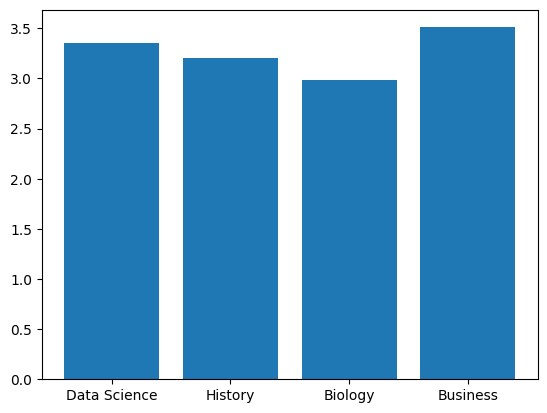

In [8]:
# What if we change bar to barh?
plt.bar(x = majors, height = gpas);

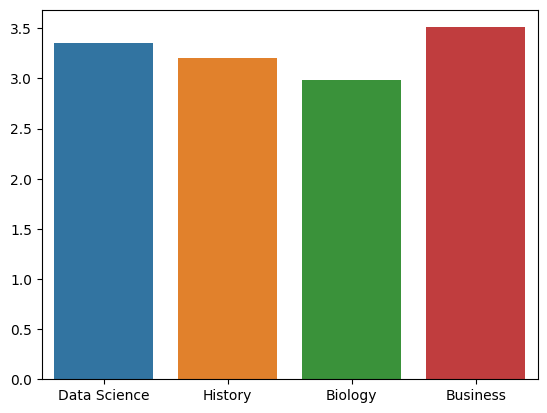

In [9]:
sns.barplot(x = majors, y = gpas);


<h2 id="Histograms">Histograms<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Histograms">¶</h2><p>Our old friend!</p>


In [10]:
bweights = births['Birth Weight']

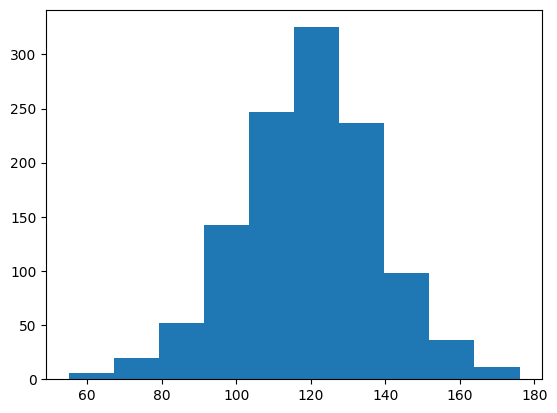

In [11]:
# By default, you get some arbitrary bins. We usually like to pick our own.
plt.hist(bweights);

In [12]:
min(bweights), max(bweights)

(55, 176)

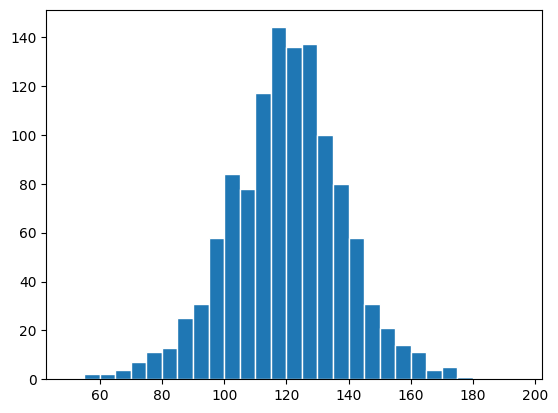

In [13]:
#change values in range
#switch density to True and see values
#delete ec parameter or change it to 'r', 'y'
bw_bins = range(50, 200, 5)
# bw_bins = [5, 100, 105, 110, 200]
plt.hist(bweights, density=False, bins=bw_bins, ec='w');
# if density=True => Area is related to density
# if density=False => height is count


<p>Increasing bin width loses granularity, but this may be fine for our purposes.</p>


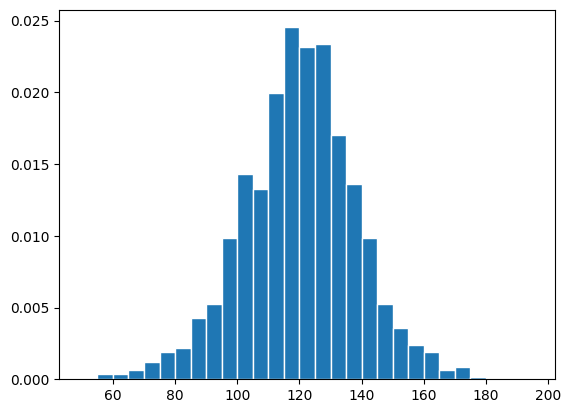

In [14]:
#increase groupe_size from 5 to 20 with step 5
groupe_size = 5
plt.hist(bweights, bins = np.arange(50, 200, groupe_size), density=True, ec='w');


<p>The bin widths don't all need to be the same!</p>


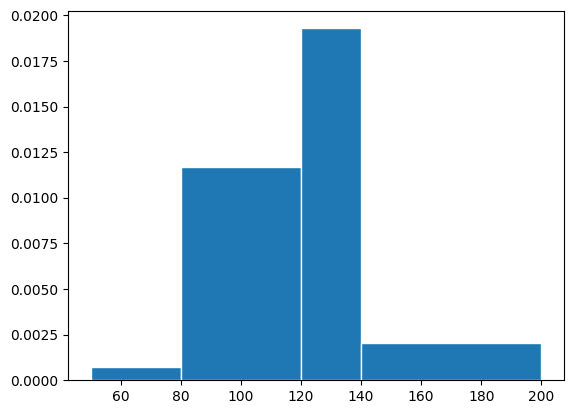

In [15]:
#bins array vlues are start and end points of groupes. play with numbers in bins
bins = [50, 80, 120, 140, 200]
plt.hist(bweights, bins=bins , density=True, ec='w');


<h2 id="Density-Curves">Density Curves<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Density-Curves">¶</h2>


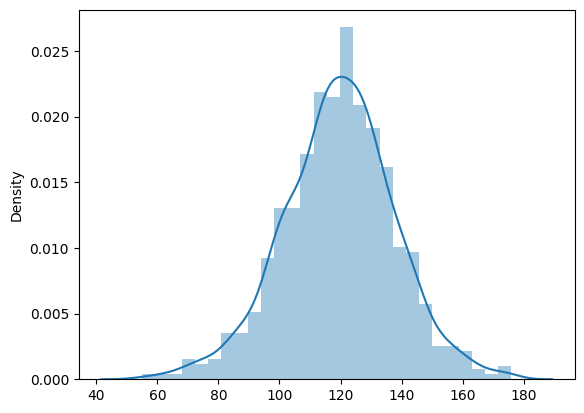

In [16]:
#change hist value to False, hide histogram
sns.distplot(x = bweights, hist=True);


<h2 id="Overlaid-Histograms-and-Density-Curves">Overlaid Histograms and Density Curves<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Overlaid-Histograms-and-Density-Curves">¶</h2>


In [17]:
sm_bweights = births[births['Maternal Smoker'] == True]['Birth Weight']
nsm_bweights = births[births['Maternal Smoker'] == False]['Birth Weight']

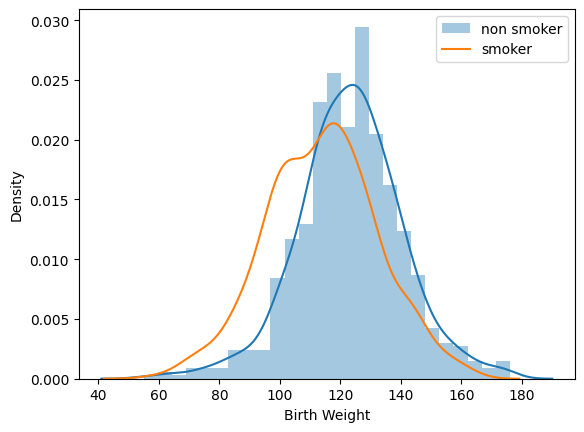

In [18]:
#change sm_bweights hist parameter to True
sns.distplot(nsm_bweights, label='non smoker', hist=True);
sns.distplot(sm_bweights, label='smoker', hist=False);
plt.legend();

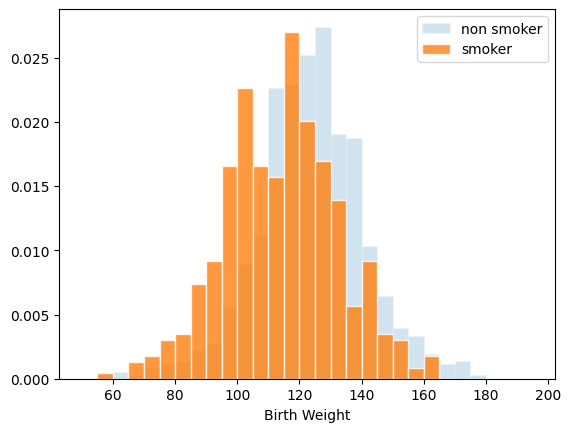

In [19]:
# Alpha adjusts transparency of the bins
plt.hist(nsm_bweights, bins=bw_bins, ec='w', density=True, alpha=0.2, label='non smoker');
plt.hist(sm_bweights, bins = bw_bins, ec='w', density=True, alpha=0.8, label='smoker');
plt.xlabel('Birth Weight')
plt.legend();


<h2 id="Box-Plots">Box Plots<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Box-Plots">¶</h2>

میانه نسبت به میانگین نسبت به داده پرت مقاوم‌تر است.


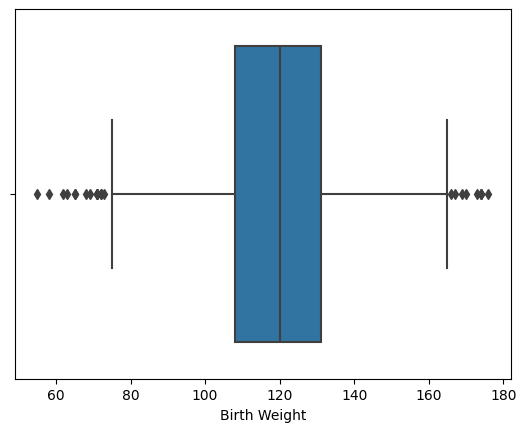

In [20]:
sns.boxplot(x = bweights);

In [21]:
#calculate values of boxplot
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr
whisk1, q1, q2, q3, whisk2

(73.5, 108.0, 120.0, 131.0, 165.5)

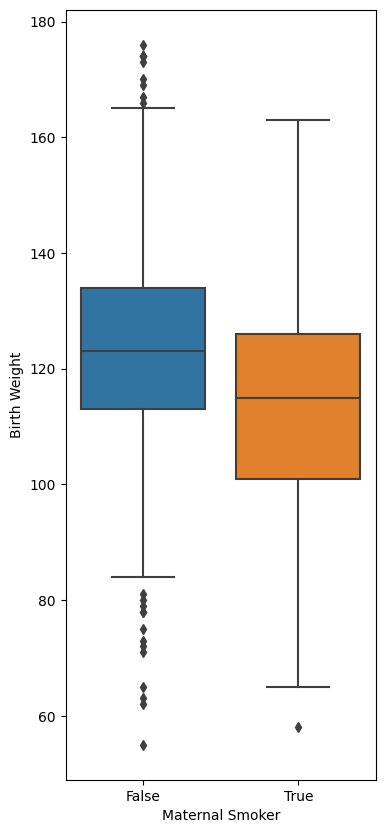

In [22]:
#change figsize values
plt.figure(figsize=(4, 10))
sns.boxplot(data=births, x='Maternal Smoker', y='Birth Weight');


<p>A less fancy version of the above two plots:</p>


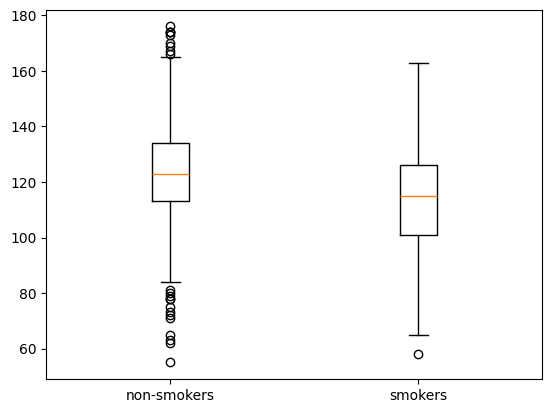

In [23]:
two_distributions = [nsm_bweights.values, sm_bweights.values]
groups = ['non-smokers', 'smokers']
plt.boxplot(two_distributions, labels=groups);

<h2> Rugplot </h2>

<Axes: xlabel='Birth Weight', ylabel='Density'>

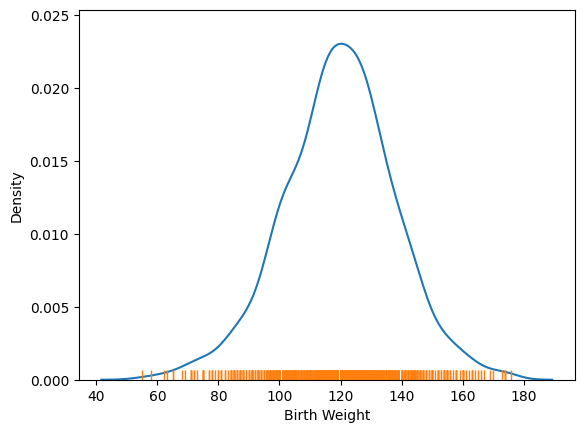

In [24]:
sns.kdeplot(data=births, x="Birth Weight")
sns.rugplot(data=births, x="Birth Weight")


<h2 id="Scatter-plots">Scatter plots<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Scatter-plots">¶</h2>


<Axes: xlabel='Birth Weight', ylabel='Maternal Height'>

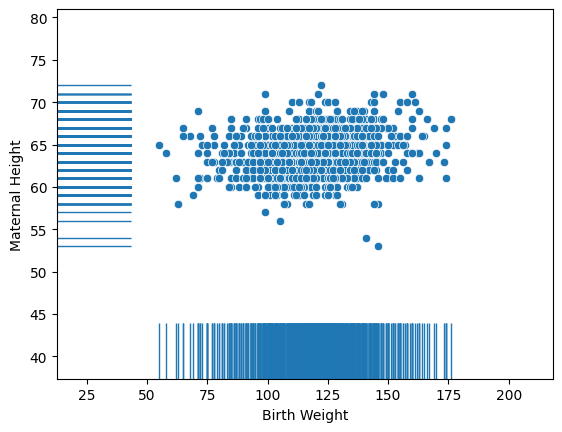

In [25]:
sns.scatterplot(data=births, x="Birth Weight", y="Maternal Height")
sns.rugplot(data=births, x="Birth Weight", y="Maternal Height", height=.15) # height is lenght of rugplot lines

In [26]:
births.sample(7)

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
352,101,278,20,62,105,False
644,109,268,29,65,120,True
226,126,277,32,66,128,False
754,124,289,29,63,110,False
90,87,255,28,61,100,True
997,91,266,23,60,120,True
1115,115,278,27,59,95,False


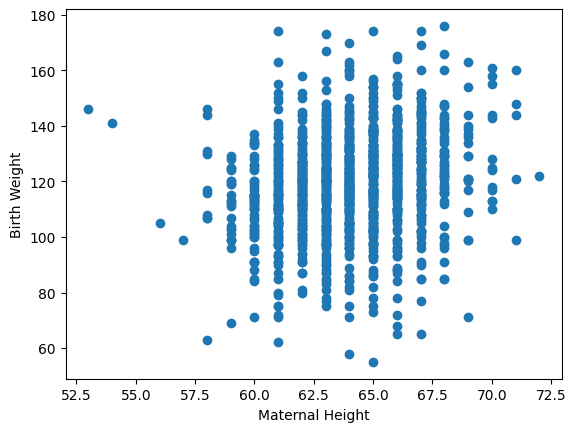

In [27]:
plt.scatter(x=births['Maternal Height'], y=births['Birth Weight'])
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight')
plt.show()

In [28]:
births['Birth Weight']

0       120
1       113
2       128
3       108
4       136
       ... 
1169    113
1170    128
1171    130
1172    125
1173    117
Name: Birth Weight, Length: 1174, dtype: int64

In [29]:
births['Maternal Height']

0       62
1       64
2       64
3       67
4       62
        ..
1169    60
1170    67
1171    65
1172    65
1173    65
Name: Maternal Height, Length: 1174, dtype: int64

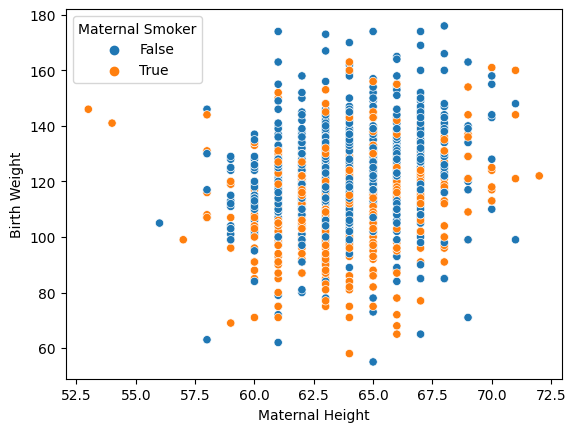

In [30]:
sns.scatterplot(data=births, x='Maternal Height', y='Birth Weight', hue='Maternal Smoker');

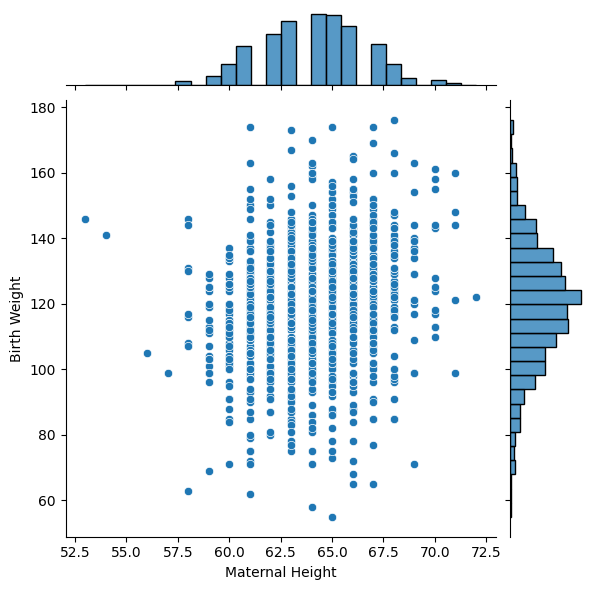

In [31]:
# try all kinds: {default: scatter, kde, hist, hex, reg}
sns.jointplot(data=births, x='Maternal Height', y='Birth Weight', kind='scatter');

Hexbin plot with marginal distributions

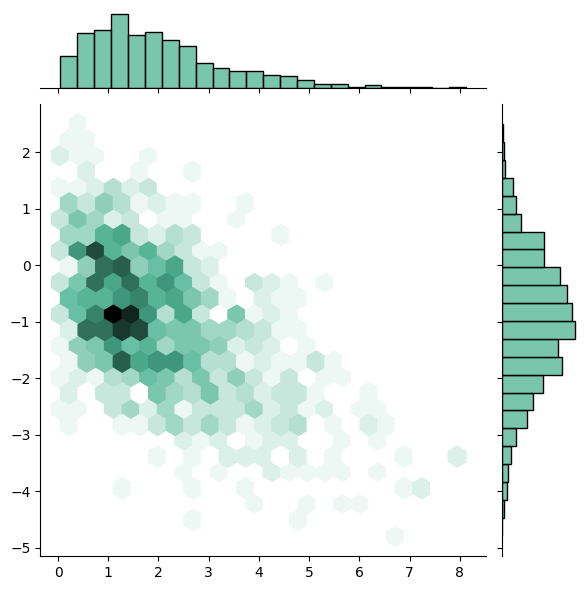

In [32]:
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391");

<h2> line plot </h2>

In [33]:
# create data like a daily statistics
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)    # rs.normal(1, 1,(365, 4))          cumulative sum in each column
dates = pd.date_range("1 1 2016", periods=365, freq="D")                        #offdet: D=Day
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()   # rolling calculation

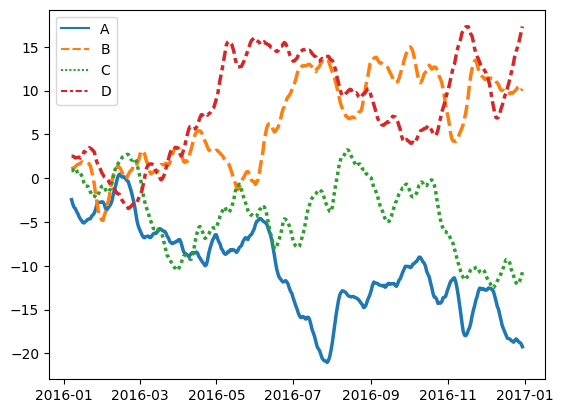

In [34]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5);

<h2>Pie chart</h2>

In [35]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

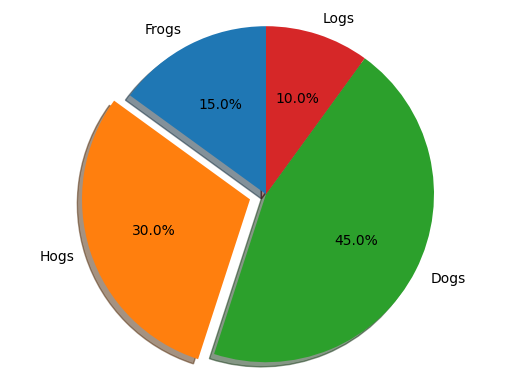

In [36]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<h1 id="Overplotting">Overplotting<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec10/lec10.html#Overplotting">¶</h1>


In [37]:
df = births

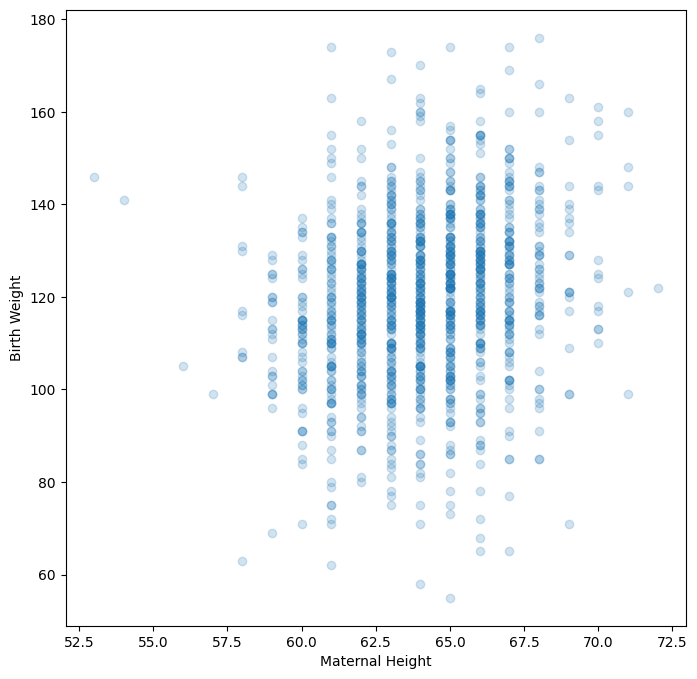

In [38]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Maternal Height'], df['Birth Weight'], alpha=0.2); #alpha is transparency
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight')
plt.show()

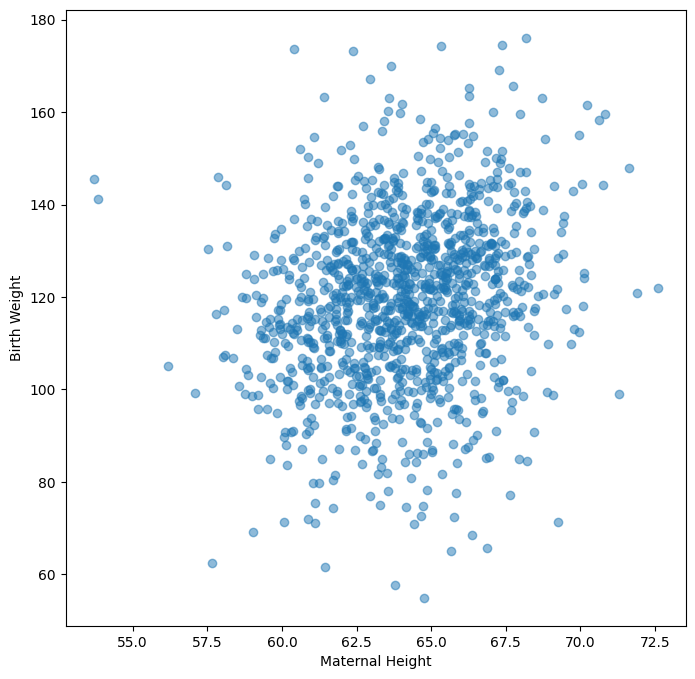

In [39]:
# add random noise to data
plt.figure(figsize=(8, 8))
r1 = np.random.randn(len(df))/3
r2 = np.random.randn(len(df))/3
plt.scatter(df['Maternal Height'] + r1, df['Birth Weight'] + r2, alpha = 0.5);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight')
plt.show()

<h2> Correlation Heatmap </h2>

create correlation matrix automatically with numerical columns.

but it seems ugly and unreadable :)

In [40]:
births.corr()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
Birth Weight,1.000000,0.407543,0.026983,0.203704,0.155923,-0.246800
Gestational Days,0.407543,1.000000,-0.053425,0.070470,0.023655,-0.060267
Maternal Age,0.026983,-0.053425,1.000000,-0.006453,0.147322,-0.067772
Maternal Height,0.203704,0.070470,-0.006453,1.000000,0.435287,0.017507
Maternal Pregnancy Weight,0.155923,0.023655,0.147322,0.435287,1.000000,-0.060281
Maternal Smoker,-0.246800,-0.060267,-0.067772,0.017507,-0.060281,1.000000


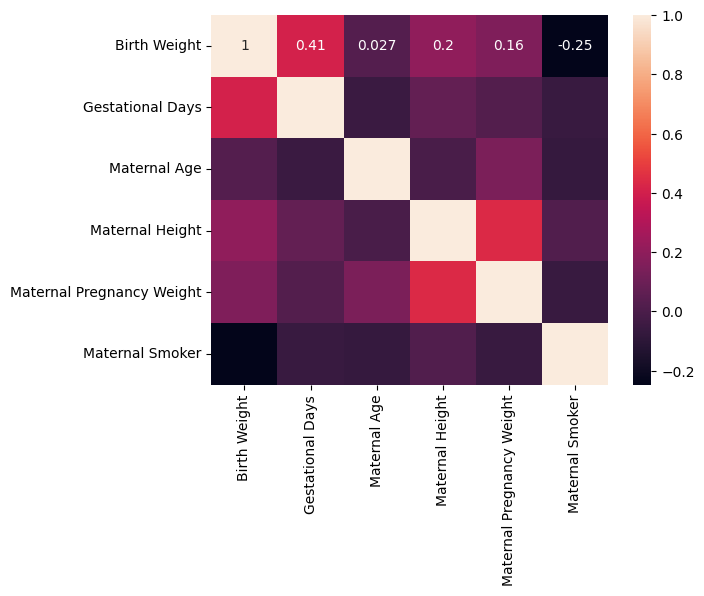

In [41]:
# test with True and False annot parameter
sns.heatmap(births.corr(), annot=True);

but correlation matrix is symmetric. If you cut away half of it along the diagonal line marked by 1-s, you would not lose any information.

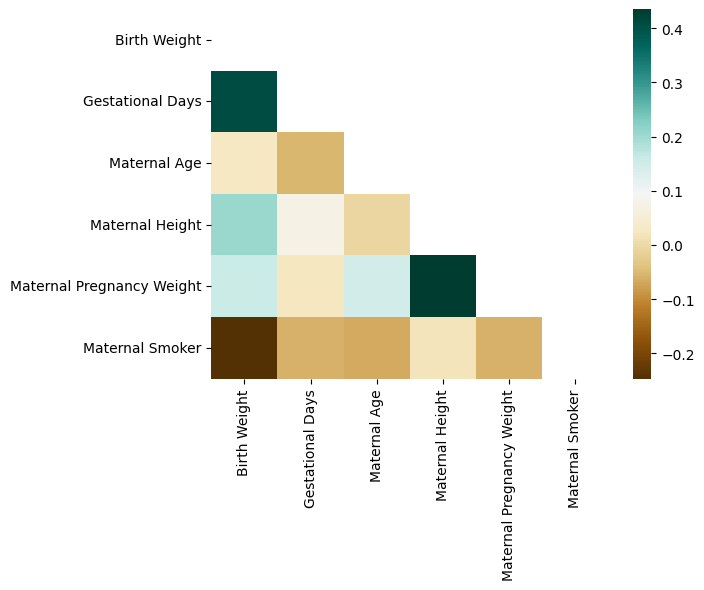

In [42]:
# change color with cmap parameter like 'YlGnBu' or 'BrBG' , ...
mask = np.triu(np.ones_like(births.corr(), dtype=bool))
sns.heatmap(births.corr(), annot=True, mask=mask, cmap='BrBG');

Often, what we want to create a colored map that shows the strength of the correlation between every independent variable that we want to include in our model and the dependent variable.

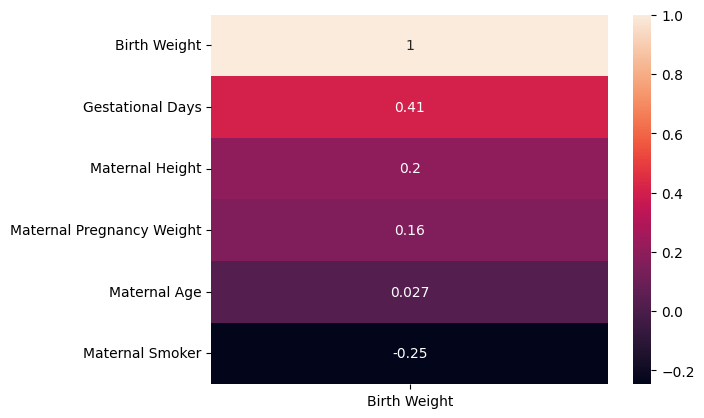

In [43]:
sns.heatmap(births.corr()[['Birth Weight']].sort_values(by='Birth Weight', ascending=False), annot=True);


<p>Let's generate data that follows <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML"&gt;&lt;mi&gt;y&lt;/mi&gt;&lt;mo&gt;=&lt;/mo&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;msup&gt;&lt;mi&gt;x&lt;/mi&gt;&lt;mn&gt;3&lt;/mn&gt;&lt;/msup&gt;&lt;/math&gt;' id="MathJax-Element-5-Frame" role="presentation" style="position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-159" style="width: 3.872em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.217em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1003.22em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-160"><span class="mi" id="MathJax-Span-161" style="font-family: STIXGeneral-Italic;">𝑦</span><span class="mo" id="MathJax-Span-162" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">=</span><span class="mn" id="MathJax-Span-163" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">2</span><span class="msubsup" id="MathJax-Span-164"><span style="display: inline-block; position: relative; width: 0.955em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.54em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-165" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.539em;"><span class="mn" id="MathJax-Span-166" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">3</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>y</mi><mo>=</mo><mn>2</mn><msup><mi>x</mi><mn>3</mn></msup></math></span></span><script id="MathJax-Element-5" type="math/tex">y = 2x^3</script>.</p>


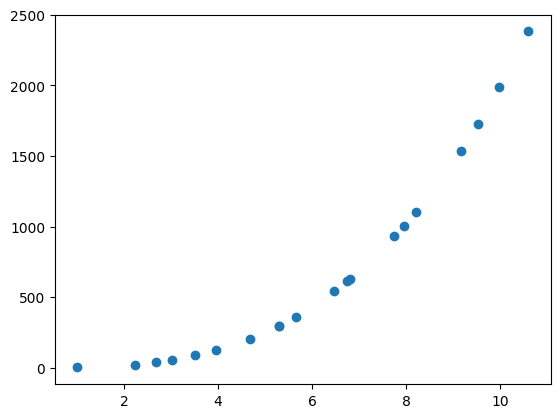

In [44]:
# generate random x and plot set y = 2 * (x**3)
x = np.array([t + np.random.random() for t in np.linspace(1, 10, 20)])
y = 2*x**3
plt.scatter(x, y);

First, let's raise  𝑥  to a power:

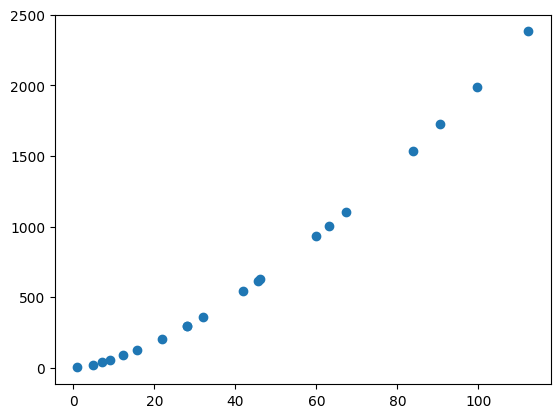

In [45]:
plt.scatter(x**2, y);

We used  $x^2$  as the transformation. It's better, but still not linear. Let's try  $x^3$ .

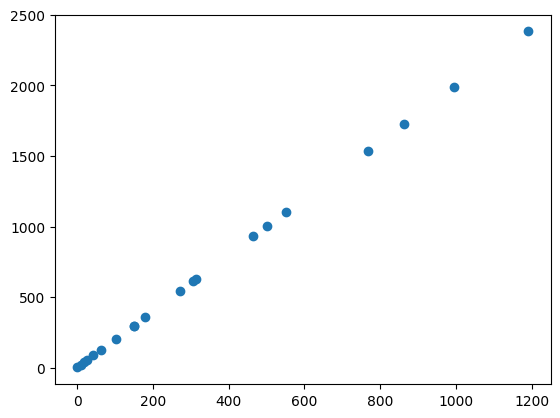

In [46]:
plt.scatter(x**3, y);

That worked well, which makes sense: the original data was cubic in  $x$ . We can overdo it, too: let's try  $x^5$ .

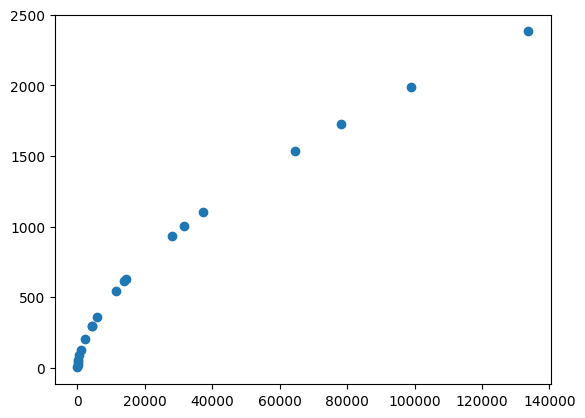

In [47]:
plt.scatter(x**5, y);


<p>Now, the data follows some sort of square root relationship. It's certainly not linear; this goes to show that not all power transformations work the same way, and you'll need some experimentation.</p>
<p>Let's instead try taking the log of y from the original data.</p>


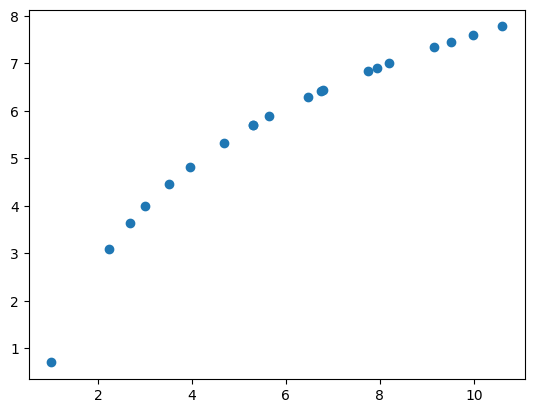

In [48]:
plt.scatter(x, np.log(y));

On it's own, this didn't quite work! Since  $𝑦=2x^3$ ,  $\log(y)=\log(2)+3\log(x)$.

That means we are essentially plotting ```plt.scatter(x, np.log(x))```, which is not linear.

In order for this to be linear, we need to take the log of  𝑥  as well:



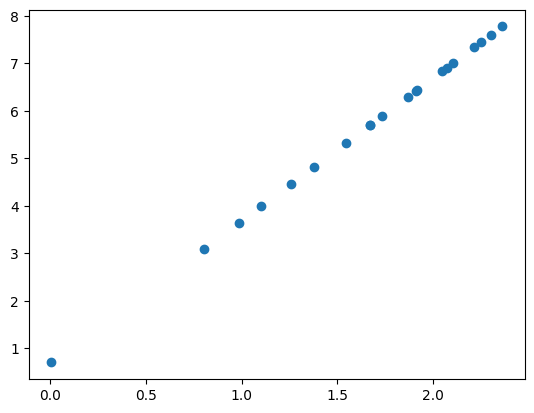

In [49]:
plt.scatter(np.log(x), np.log(y));


<p>The relationship being visualized now is</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML" display="block"&gt;&lt;mi&gt;log&lt;/mi&gt;&lt;mo&gt;&amp;#x2061;&lt;/mo&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mi&gt;y&lt;/mi&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;mo&gt;=&lt;/mo&gt;&lt;mi&gt;log&lt;/mi&gt;&lt;mo&gt;&amp;#x2061;&lt;/mo&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;mo&gt;+&lt;/mo&gt;&lt;mn&gt;3&lt;/mn&gt;&lt;mi&gt;log&lt;/mi&gt;&lt;mo&gt;&amp;#x2061;&lt;/mo&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mi&gt;x&lt;/mi&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;/math&gt;' id="MathJax-Element-16-Frame" role="presentation" style="text-align: center; position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-225" style="width: 12.682em; display: inline-block;"><span style="display: inline-block; position: relative; width: 10.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.729em, 1010.48em, 2.979em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-226"><span class="mi" id="MathJax-Span-227" style="font-family: STIXGeneral-Regular;">log</span><span class="mo" id="MathJax-Span-228"></span><span class="mo" id="MathJax-Span-229" style="font-family: STIXGeneral-Regular;">(</span><span class="mi" id="MathJax-Span-230" style="font-family: STIXGeneral-Italic;">𝑦</span><span class="mo" id="MathJax-Span-231" style="font-family: STIXGeneral-Regular;">)</span><span class="mo" id="MathJax-Span-232" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">=</span><span class="mi" id="MathJax-Span-233" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">log</span><span class="mo" id="MathJax-Span-234"></span><span class="mo" id="MathJax-Span-235" style="font-family: STIXGeneral-Regular;">(</span><span class="mn" id="MathJax-Span-236" style="font-family: STIXGeneral-Regular;">2</span><span class="mo" id="MathJax-Span-237" style="font-family: STIXGeneral-Regular;">)</span><span class="mo" id="MathJax-Span-238" style="font-family: STIXGeneral-Regular; padding-left: 0.241em;">+</span><span class="mn" id="MathJax-Span-239" style="font-family: STIXGeneral-Regular; padding-left: 0.241em;">3</span><span class="mi" id="MathJax-Span-240" style="font-family: STIXGeneral-Regular; padding-left: 0.182em;">log</span><span class="mo" id="MathJax-Span-241"></span><span class="mo" id="MathJax-Span-242" style="font-family: STIXGeneral-Regular;">(</span><span class="mi" id="MathJax-Span-243" style="font-family: STIXGeneral-Italic;">𝑥</span><span class="mo" id="MathJax-Span-244" style="font-family: STIXGeneral-Regular;">)</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.218em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math display="block" xmlns="http://www.w3.org/1998/Math/MathML"><mi>log</mi><mo>⁡</mo><mo stretchy="false">(</mo><mi>y</mi><mo stretchy="false">)</mo><mo>=</mo><mi>log</mi><mo>⁡</mo><mo stretchy="false">(</mo><mn>2</mn><mo stretchy="false">)</mo><mo>+</mo><mn>3</mn><mi>log</mi><mo>⁡</mo><mo stretchy="false">(</mo><mi>x</mi><mo stretchy="false">)</mo></math></span></span></div><script id="MathJax-Element-16" type="math/tex; mode=display">\log(y) = \log(2) + 3 \log(x)</script>


***there are lots of nice examples with [seaborn](https://seaborn.pydata.org/examples/index.html) and [matplotlib](https://matplotlib.org/stable/gallery/index.html)***